# Initialization

## Importing libraries

As a first step we load the different libraries we are going to use, in this simple example we only need tensorflow (keras) and numpy

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization,Dropout,Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ThresholdedReLU,ReLU
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

## Data related parameters

We define a few parameters related to the data we are going to use

In [2]:
# Parameters of the model 
num_classes = 10 # number of output class (1-9)
input_shape = (28, 28, 1) # shape of the input, we have 28 x 28 pixel size images of each number


## Loading Data

Next step is to actually load the MNIST database and perform some simple pre-process in order to introduce it to the neural network


In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # we load the data from keras.datsets library

# This automatically generates the train & test set (otherwise we could have done it manually or through another library)

## Normalization ##
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 # images are encoded with up to 256 so to normalize from 0-1 we simply divide
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Assisting variables to plot examples
y_train_initial = y_train
y_test_initial = y_test
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Visualize the dataset

Let's see a few examples by eye now.

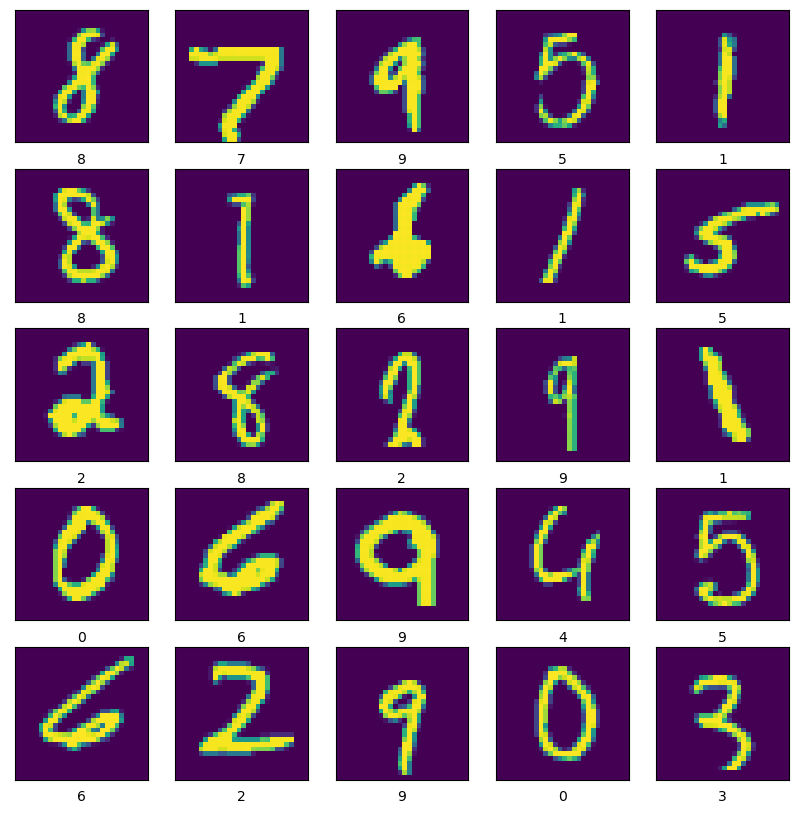

In [4]:
class_names = ['0', '1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 60000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_image])
    plt.xlabel(class_names[y_train_initial[random_image]])
plt.show()

## Model related parameters

Here we define hyperparameters that are going to be used in the model and training below


In [5]:
n_epochs = 5 # Number of epochs, where 1 epoch = 1 use of the training set
n_batch_size = 256 # how many inputs are going to be used at the same time during one epoch. 
# note: small batch size can make the training faster but can make the generalization harder to achieve (less variety in sample)

neurons_conv2d1 = 32
kernel_size_conv2d1 = (3,3)

neurons_conv2d2 = 64
kernel_size_conv2d2 = (3,3)

default_pool_size = (2,2)

# number of neurons for the 2 hidden layers
neurons_l2 = 200
neurons_l1 = 150

# dropout layers
CNN_dropout = 0.25
NN_dropout = 0.5

In [6]:
model = keras.Sequential()

model.add(Conv2D(neurons_conv2d1,kernel_size=kernel_size_conv2d1, activation ="relu")) # obtaining features from image
model.add(MaxPooling2D(pool_size=default_pool_size)) # reducing dimensionality

model.add(Conv2D(neurons_conv2d2,kernel_size_conv2d2, activation ="relu"))
model.add(MaxPooling2D(pool_size=default_pool_size))

model.add(Dropout(CNN_dropout))

model.add(Flatten()) # Since the image is 2D we need to "flatten" it into a single array in order to be used as input
model.add(Dense(neurons_l2))
model.add(ReLU())
model.add(Dense(neurons_l1))
model.add(ReLU())
model.add(Dropout(NN_dropout))  # this layers protects the model from overfitting to the test data.

model.add(Dense(num_classes,activation='softmax')) # multi-class classification problem : softmax activation
model.compile(
              optimizer="adam", # any optimizer works well, adam is a standard choice for simple problems
              loss="categorical_crossentropy", # loss function for classification = crossentropy
              metrics=["accuracy"])

## Example of Training proccedure


Let's now train our model for a few epochs

In [7]:
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch_size)

Epoch 1/5
235/235 [==============================] - 33s 142ms/step - loss: 0.3569 - accuracy: 0.8870
Epoch 2/5
235/235 [==============================] - 28s 121ms/step - loss: 0.0944 - accuracy: 0.9719
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 0.0670 - accuracy: 0.9800
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 5/5
235/235 [==============================] - 32s 135ms/step - loss: 0.0436 - accuracy: 0.9870


## Evaluation

To evulate our model we need to see how well it performs to unknown data (test set):

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02693801186978817
Test accuracy: 0.9907000064849854


In [9]:
predictions = model.predict(x_test)
predictions_binary = np.argmax(predictions, axis = 1)
y_test_binary = np.argmax(y_test, axis=1)
    
cr = classification_report(y_test_binary, predictions_binary)
cm = confusion_matrix(y_test_binary, predictions_binary)
print(cm)
print(cr)

[[ 974    0    0    0    0    0    3    2    1    0]
 [   0 1133    0    0    0    1    1    0    0    0]
 [   2    0 1024    0    1    0    0    4    1    0]
 [   0    0    2 1001    0    3    0    2    2    0]
 [   0    0    0    0  975    0    4    0    0    3]
 [   1    0    0    4    0  883    1    1    0    2]
 [   3    2    0    0    1    3  949    0    0    0]
 [   0    1    5    0    0    0    0 1018    1    3]
 [   4    1    2    2    0    1    0    2  956    6]
 [   2    0    0    1    6    5    0    0    1  994]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99   

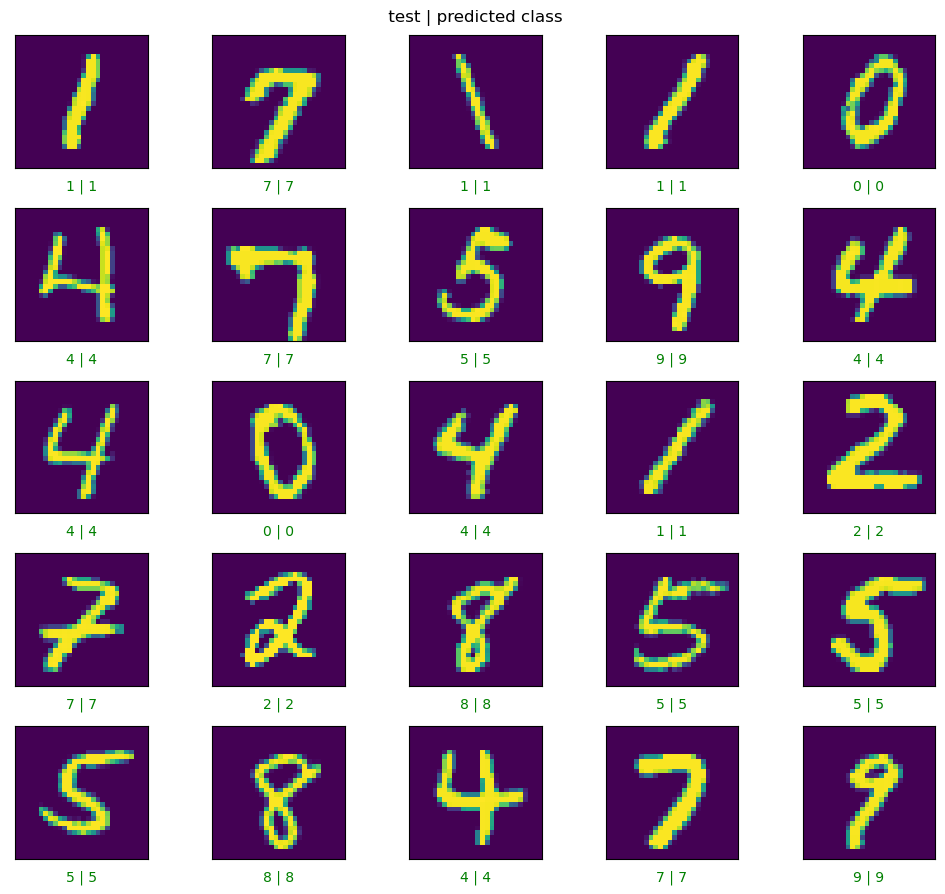

In [13]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[random_image])
    if class_names[int(y_test_initial[random_image])] ==class_names[predictions_binary[random_image]]:
        plt.xlabel(class_names[int(y_test_initial[random_image])] + " | " + class_names[predictions_binary[random_image]],color='green')
    else:
        plt.xlabel(class_names[int(y_test_initial[random_image])] + " | " + class_names[predictions_binary[random_image]],color='red')
plt.suptitle(' test | predicted class')
fig.tight_layout(rect=[0, 0.09, 1, 1])
plt.show()